# Climate change Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [4]:
data=pd.read_csv("Datasets/daily_temperature_1000_cities_1980_2020.csv",low_memory=False)

In [5]:
data.head(20)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,city,Tokyo,New York,Mexico City,Mumbai,São Paulo,Delhi,Shanghai,Kolkata,Los Angeles,...,Bilāspur,Sargodha,Leipzig,Tinnevelly,Cancún,Yangzhou,Novokuznetsk,Latakia,Heroica Matamoros,Göteborg
1,city_ascii,Tokyo,New York,Mexico City,Mumbai,Sao Paulo,Delhi,Shanghai,Kolkata,Los Angeles,...,Bilaspur,Sargodha,Leipzig,Tinnevelly,Cancun,Yangzhou,Novokuznetsk,Latakia,Heroica Matamoros,Goteborg
2,lat,35.685,40.6943,19.4424,19.017,-23.5587,28.67,31.2165,22.495,34.1139,...,22.0904,32.0854,51.3354,8.7304,21.17,32.4,53.75,35.54,25.88,57.75
3,lng,139.7514,-73.9249,-99.131,72.857,-46.625,77.23,121.4365,88.3247,-118.4068,...,82.16,72.675,12.41,77.69,-86.83,119.43,87.115,35.78,-97.5,12.0
4,country,Japan,United States,Mexico,India,Brazil,India,China,India,United States,...,India,Pakistan,Germany,India,Mexico,China,Russia,Syria,Mexico,Sweden
5,iso2,JP,US,MX,IN,BR,IN,CN,IN,US,...,IN,PK,DE,IN,MX,CN,RU,SY,MX,SE
6,iso3,JPN,USA,MEX,IND,BRA,IND,CHN,IND,USA,...,IND,PAK,DEU,IND,MEX,CHN,RUS,SYR,MEX,SWE
7,admin_name,Tōkyō,New York,Ciudad de México,Mahārāshtra,São Paulo,Delhi,Shanghai,West Bengal,California,...,Chhattīsgarh,Punjab,Saxony,Tamil Nādu,Quintana Roo,Jiangsu,Kemerovskaya Oblast’,Al Lādhiqīyah,Tamaulipas,Västra Götaland
8,capital,primary,NaN,primary,admin,admin,admin,admin,admin,NaN,...,NaN,minor,minor,NaN,minor,NaN,NaN,admin,minor,admin
9,population,35676000.0,19354922.0,19028000.0,18978000.0,18845000.0,15926000.0,14987000.0,14787000.0,12815475.0,...,543454.0,542603.0,542529.0,542200.0,542043.0,539715.0,539616.0,539147.0,538785.0,537797.0


# Get the rows where the dates begin, so that we can begin iterating through the rows.

In [6]:

regex='\d{4}'
df=data[data['Unnamed: 0'].str.contains(regex)]
df.head(-10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
12,1980-01-01,4.16,1.48,11.35,23.4,17.86,13.74,9.1,20.47,14.24,...,22.14,11.54,0.67,24.05,21.21,3.71,-13.88,11.68,17.67,-0.82
13,1980-01-02,4.06,1.0,10.01,22.67,18.65,12.85,6.4,19.37,13.77,...,22.26,11.13,-0.88,24.19,23.29,3.26,-15.05,13.71,17.7,-5.25
14,1980-01-03,7.12,-3.23,9.67,22.3,18.42,10.5,5.43,18.71,12.08,...,21.09,10.28,-4.3,24.39,24.04,2.17,-14.19,13.0,11.19,-13.0
15,1980-01-04,9.23,-1.81,10.12,23.4,19.21,10.87,2.29,18.76,11.19,...,20.39,10.98,-6.75,24.12,21.49,-0.95,-15.09,12.67,14.22,-11.75
16,1980-01-05,3.2,-4.31,10.81,23.98,21.34,11.03,2.4,18.62,12.78,...,19.51,11.27,0.1,23.86,21.2,-0.66,-13.85,10.09,18.3,-2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,2020-09-16,24.94,19.46,16.27,27.15,22.64,32.29,24.9,30.38,24.84,...,30.22,32.23,21.38,29.57,28.44,24.45,17.07,26.82,26.51,13.09
14882,2020-09-17,26.83,19.39,15.71,26.99,21.12,32.6,20.11,30.66,25.72,...,30.43,33.04,14.95,29.62,28.26,20.19,16.22,27.4,25.29,9.11
14883,2020-09-18,28.3,14.34,14.32,27.08,23.42,32.8,18.03,29.94,25.62,...,29.3,33.16,13.35,29.67,28.35,20.87,12.66,27.55,25.68,12.17
14884,2020-09-19,23.97,13.39,14.63,27.35,17.46,31.71,20.79,31.0,22.43,...,28.3,32.41,14.21,27.63,28.68,21.9,10.6,28.02,25.32,13.5


In [43]:
curr_year = 1980
daily_avg = []
yearly_avg = []
for idx, row in df.iterrows():
    year = int(row.iloc[0][0:4])
    if year == curr_year:
        daily_avg.append(row[1:].values.astype('float').mean())
    else:
        yearly_avg.append(np.mean(daily_avg))
        curr_year += 1
        daily_avg = []
        daily_avg.append(row[1:].values.astype('float').mean())
print('Some yearly averages:\n', yearly_avg[0:8])
print('Ensuring we captured every year, the length of the yearly averages array is:', len(yearly_avg))


Some yearly averages:
 [17.572966885245904, 17.687739561643834, 17.682352684931505, 17.81350109589041, 17.414236065573768, 17.47158991780822, 17.59333221917808, 17.84376216438356]
Ensuring we captured every year, the length of the yearly averages array is: 40


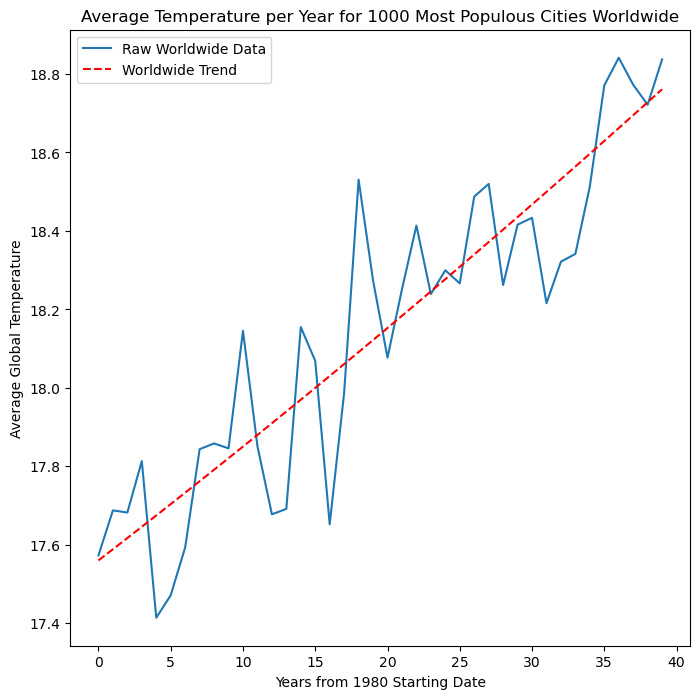

Total global warming (1980-2019) is approximately 18.7943-17.5603 = ~1.2340 degrees C


In [39]:
x = np.arange(0,len(yearly_avg))
y = yearly_avg 
z = np.polyfit(x,y,2)
p = np.poly1d(z)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, yearly_avg, label='Raw Worldwide Data')
ax.plot(x,p(x),"r--", label='Worldwide Trend')
ax.set_xlabel('Years from 1980 Starting Date')
ax.set_ylabel('Average Global Temperature')
ax.set_title('Average Temperature per Year for 1000 Most Populous Cities Worldwide')
ax.legend(loc='upper left')
plt.show()
print('Total global warming (1980-2019) is approximately {:0.4f}-{:0.4f} = ~{:0.4f} degrees C'.format(p(40), p(0),p(40)-p(0)))

In [40]:
# Lets show why looking at one city may not represent this well

daily_KL = np.array([])
daily_DL = np.array([])
daily_MB = np.array([])
yearly_avg_KL = np.array([])
yearly_avg_DL = np.array([])
yearly_avg_MB = np.array([])
count = 0
curr_year = 1980
for _, row in df.iterrows():
    year = int(row.iloc[0][0:4])
    if year == curr_year:
        daily_KL = np.append(daily_KL, float(row['7']))
        daily_DL = np.append(daily_DL, float(row['5']))
        daily_MB = np.append(daily_MB, float(row['3']))
    else:
        yearly_avg_KL = np.append(yearly_avg_KL, np.mean(daily_KL))
        yearly_avg_DL = np.append(yearly_avg_DL, np.mean(daily_DL))
        yearly_avg_MB = np.append(yearly_avg_MB, np.mean(daily_MB))
        curr_year += 1
        daily_KL = np.array([])
        daily_DL = np.array([])
        daily_MB = np.array([])
        daily_KL = np.append(daily_KL, float(row['7']))
        daily_DL = np.append(daily_DL, float(row['5']))
        daily_MB = np.append(daily_MB, float(row['3']))

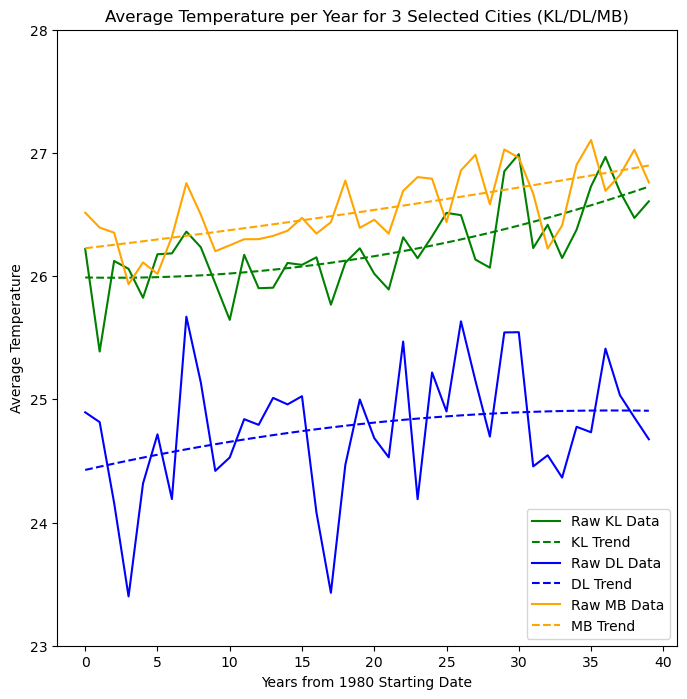

In [41]:
y2_KL = yearly_avg_KL      
z2_KL = np.polyfit(x,yearly_avg_KL, 2)
p2_KL = np.poly1d(z2_KL)
y2_DL = yearly_avg_DL
z2_DL = np.polyfit(x,yearly_avg_DL, 2)
p2_DL = np.poly1d(z2_DL)
y2_MB = yearly_avg_MB
z2_MB = np.polyfit(x,yearly_avg_MB, 2)
p2_MB = np.poly1d(z2_MB)

fig2, ax2 = plt.subplots(figsize=(8,8))
ax2.plot(x, y2_KL, color='Green', label='Raw KL Data')
ax2.plot(x,p2_KL(x),"g--", label='KL Trend')
ax2.plot(x, y2_DL, color='Blue', label='Raw DL Data')
ax2.plot(x,p2_DL(x),"b--", label='DL Trend')
ax2.plot(x, y2_MB, color='Orange', label='Raw MB Data')
ax2.plot(x,p2_MB(x),"--", color='orange', label='MB Trend')
ax2.set_xlabel('Years from 1980 Starting Date')
ax2.set_ylabel('Average Temperature')
ax2.set_title('Average Temperature per Year for 3 Selected Cities (KL/DL/MB)')
ax2.legend(loc='lower right')
ax2.set_ylim([23,28])
plt.show()